In [2]:
demand = []
cdemand = [] # TODO 这个cdemand是啥
fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/historydemand/slot20/groundtruth/24', 'r')
for line in fopen:
    line = line.strip().split(',')
    csum = 0
    one = []
    for k in line:
        one.append((float(k)))
        csum += (float(k))
    demand.append(csum) # 37 每个line所有的数据加起来是csum 从i出去的demandd
    cdemand.append(one) # 37x37 i到j的demand
fopen.close()

In [10]:
def createa(a,b,c):
    a += 1
    b += 1
    c += 12
    return a,b,c

def createb(a,b,c):
    a += 5
    b += 8
    return a,b,c


a,b,c = 1,1,1
d,e,f = createa(a,b,c)
print(d,e,f)
g,h,i = createb(a,b,c)
print(g,h,i)

2 2 13
6 9 1


In [34]:
b = [2,8,9,10,3,5]

In [36]:
a = [0,1,2,3,4,5]
# energy = {}
# for i in range(len(a)):
#     energy
a = sorted(a,key = lambda x:b[x])
a

[0, 4, 5, 1, 2, 3]

In [37]:
import pandas as pd

# 从字典创建 DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, 32, 18, 47],
        'country': ['US', 'UK', 'Canada', 'Australia']}
df = pd.DataFrame(data)
print(df)


      name  age    country
0    Alice   25         US
1      Bob   32         UK
2  Charlie   18     Canada
3    David   47  Australia


In [38]:
df['name'][1]

'Bob'

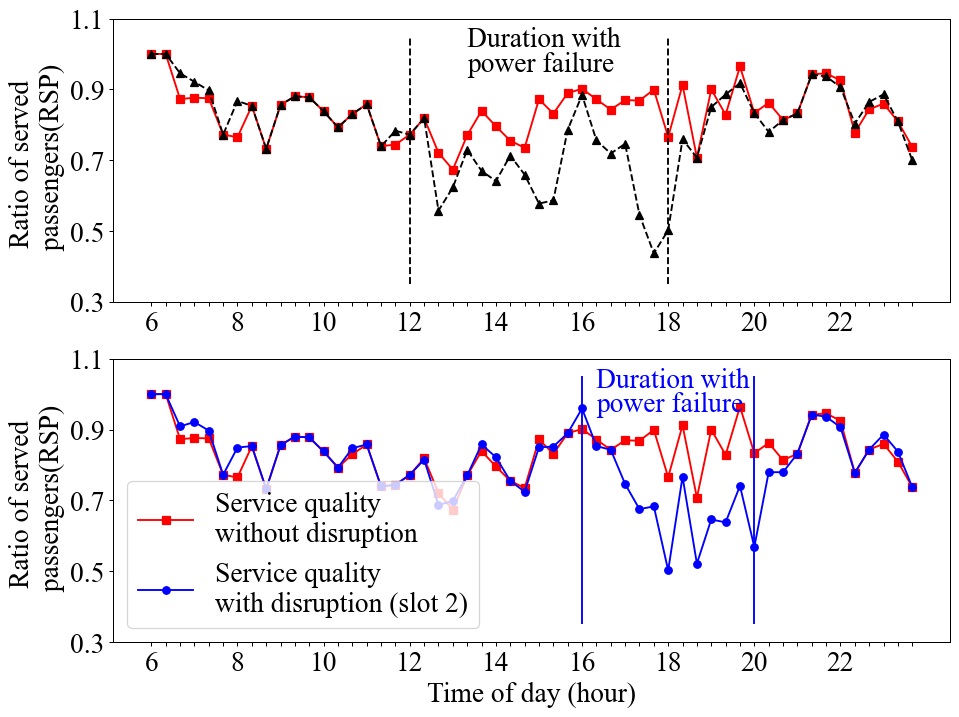

In [268]:
def figure1ServedPassenger():
    '''Disruption Happened in [32,6,2,1] in Summer 12pm to 6pm (Timeslot 36 to 54), Compared with baseline'''
    '''Passenger Served'''
    # res = passenger_serve('beta',25,'Summer')

    disruption = 32

    #data
    x = [m for m in range(18, 72)]
    res_dis = passenger_serve('beta',41,'Summer')
    res_base = passenger_serve('baseline',9,'Noseason')
    res_dis_winter = passenger_serve('beta',32,'Winter')

    y_dis_area,y_base,y_dis_win = [],[],[]
    for i in range(len(res_dis)):
        y_dis_area.append(res_dis[i][disruption])
        y_base.append(res_base[i][disruption])
        y_dis_win.append(res_dis_winter[i][disruption])
    # y_dis = passenger_serve_totalratio('beta',25,'Summer')

    #figure plot
    plt.figure(figsize=(12,9),dpi=90)
#     plt.title('Service Quality in Central Region',fontsize = 15 )

    plt.subplot(2,1,1)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_area,'^--',color = 'black',label="Service quality \nwith disruption (slot 1)")
#     plt.plot(x,y_dis_win,'o-',color = 'b',label="RSP in Disruption Area (Slot 2)")
    # plt.plot(x,result_disrupt_winter,'^-',color = 'g',label = 'disruption_winter')
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
    
    
    
    plt.subplot(2,1,2)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_win,'o-',color = 'b',label="Service quality \nwith disruption (slot 2)")
    plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2), fontproperties = legend_font)
    plt.legend(loc = "best",prop = legend_font)#图例
    
    
    plt.text(49,1.02,'Duration with', fontproperties = legend_font,color = 'b')
    plt.text(49,0.95,'power failure', fontproperties = legend_font,color = 'b')


    plt.show()
figure1ServedPassenger()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

legend_font = {"family" : "Times New Roman","size":22}

In [234]:
'''Served Passenger 处理， 保留每个timeslot的passenger serve情况'''
def passengerServeNew(exp,file_no,season):
    if exp == 'beta':
        fopen = open('/Users/zihanding/Developer/Psquare/newevaluation/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    elif exp == 'baseline':
        fopen = open('/Users/zihanding/Developer/Yukun/newevaluation/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    else:
        return 'Please provide valid experiment type.'#     passenger_served_ratio = []
    
    result_served = [] # served passenger 54*37*37
    result_total = [] # total passenger demand 54*37*37
    count = 0
    ab = 0
    temp_s = []
    temp_t = []
    
    for line in fopen:
        if count == 37:
            if ab ==0:
                result_served.append(temp_s)
                temp_s = []
                ab = 1
            else:
                result_total.append(temp_t)
                temp_t = []
                ab = 0
            count = 0
        count += 1
        line = line.strip()[1:-1].split(',')
        for i in range(0,len(line)):
            line[i] = float(line[i])
        if ab == 0:
            temp_s.append(line)
        else:
            temp_t.append(line)
    if ab ==0:
        result_served.append(temp_s)
        temp_s = []
        ab = 1
    else:
        result_total.append(temp_t)
        temp_t = []
        ab = 0
    
    fopen.close()
    
    #result_served,result_total 54*37*37矩阵 分别是每个timeslot从i到j的passenger served和passenger demand
    return result_served, result_total

def passenger_serve(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    
    for i in range(len(demand)):
        ratio = []
        for j in range(len(demand[0])):
            cs,cd = 0,0
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
            if cd == 0:
                if cs !=0:
                    print('error!!!!!')
                ratio.append(1.0)
            else:
                ratio.append(cs/cd)
        result.append(ratio)
    return result
    
    #result 54*37的矩阵 每个timeslot，每个region的passenger serve情况
    
def passenger_serve_totalratio(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    for i in range(len(demand)):
        cs, cd = 0,0
        for j in range(len(demand[0])):
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
        if cd == 0:
            result.append(1.0)
        else:
            result.append(cs/cd)
    return result

In [260]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]
    y_dis_area = region_ratio
    plt.figure(figsize=(14,5),dpi=90)
    
    plt.plot(x,y_dis_area,'s-',color = 'r',label="Fairness aware")
    plt.plot(x,region_ratio1,'o-',color = 'b',label="Fairness Not aware")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
#     plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

19


In [371]:
def cal_region(round):
    region = [32,6,2,1]
    region_ratio1 = []

    for x in range(18,72):
        cs,cd = generate_sd(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return region_ratio1

In [501]:
region9 = cal_region(9)
# region8 = cal_region(8)
region10 = cal_region(10)
region11 = cal_region(11)
region12 = cal_region(12)

region13 = cal_region(13)
region14 = cal_region(14)
region15 = cal_region(15)

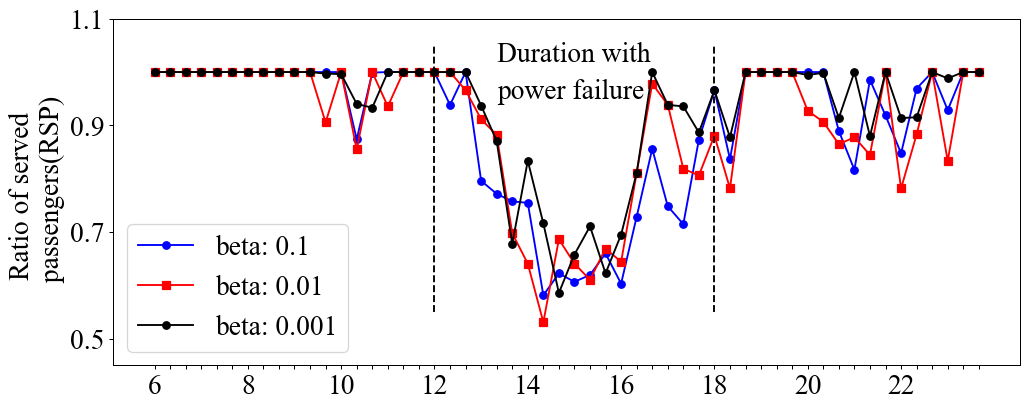

In [511]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(13,5),dpi=90)
    
#     plt.subplot(2,1,1)
    plt.plot(x,region11,'o-',color = 'b',label="beta: 0.1")
    plt.plot(x,region10,'s-',color = 'r',label="beta: 0.01")
    plt.plot(x,region12,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([36, 54], 0.55, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.45, 1.1) 
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
    
#     plt.subplot(2,1,2)
    
#     plt.plot(x,region13,'o-',color = 'b',label="beta: 0.1")
#     plt.plot(x,region14,'s-',color = 'r',label="beta: 0.01")
#     plt.plot(x,region15,'o-',color = 'black',label="beta: 0.001")
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
#     plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
# #     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

#     plt.vlines([48, 60], 0.55, 1.05, colors='blue')
#     plt.xticks(xt,yt,fontproperties = legend_font)
#     plt.xticks(x,fontproperties = legend_font)
#     plt.yticks(np.arange(0.3, 1.2, step=0.2), fontproperties = legend_font)
#     plt.legend(loc = "best",prop = legend_font)#图例
#     plt.ylim(0.5, 1.1) 
    
    
#     plt.text(49,0.65,'Duration with', fontproperties = legend_font,color = 'b')
#     plt.text(49,0.58,'power failure', fontproperties = legend_font,color = 'b')
figuretest()

In [715]:
def transfer(region_ratio):
    n = len(region_ratio)
    res = []
    count,temp = 0,0
    for i in range(n):
#         print(res)
        if count == 3:
            res.append(temp/3)
            count = 0
            temp = 0
        temp += region_ratio[i]
        count += 1
    res.append(temp/3)
    return res
print(len(transfer(region16)))

18


In [601]:

# region8 = cal_region(8)
region16 = cal_region(34)
region17 = cal_region(35)
region18 = cal_region(36)

# Comparison of C&R vs. AFC

In [656]:

#psquare c and r with dis

car1 = cal_region(46) #beta = 0.1
car2 = cal_region(47) #beta = 0.01
car3 = cal_region(48) #beta = 0.001

#AFC
afc1 = cal_region(34) #beta = 0.1
afc2 = cal_region(37) #beta = 0.01
afc3 = cal_region(40) #beta = 0.001


region_mix_afc = []
for i in range(len(region10)):
    region_mix_afc.append((afc1[i]+afc2[i]+afc3[i])/3)

    
region_mix_crp = []
for i in range(len(region10)):
    region_mix_crp.append((car1[i]+car2[i]+car3[i])/3)


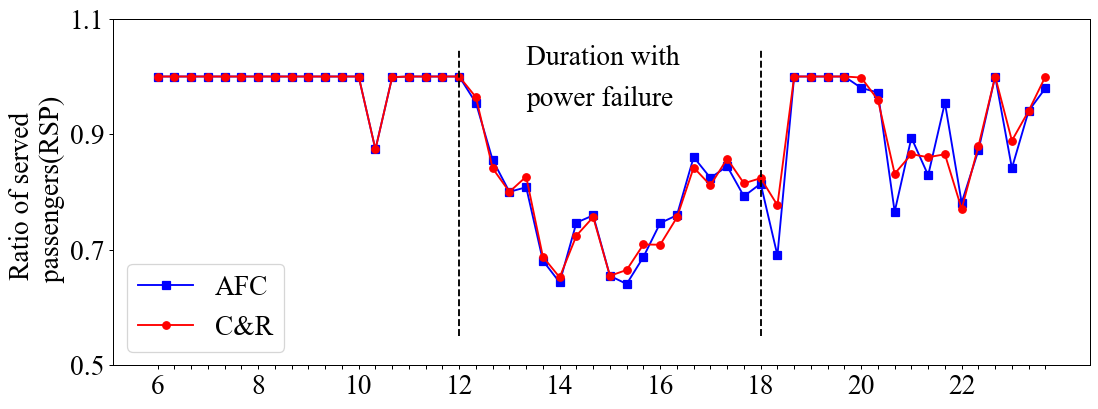

In [659]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(14,5),dpi=90)
    plt.plot(x,region_mix_afc,'s-',color = 'b',label="AFC")
    plt.plot(x,region_mix_crp,'o-',color = 'r',label="C&R")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([36, 54], 0.55, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.5, 1.1) 
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

### Case 2

In [665]:

#psquare c and r with dis

car1 = cal_region(43) #beta = 0.1
car2 = cal_region(44) #beta = 0.01
car3 = cal_region(45) #beta = 0.001

#AFC
afc1 = cal_region(25) #beta = 0.1
afc2 = cal_region(28) #beta = 0.01
afc3 = cal_region(31) #beta = 0.001


region_mix_afc = []
for i in range(len(region10)):
    region_mix_afc.append((afc1[i]+afc2[i]+afc3[i])/3)

    
region_mix_crp = []
for i in range(len(region10)):
    region_mix_crp.append((car1[i]+car2[i]+car3[i])/3)

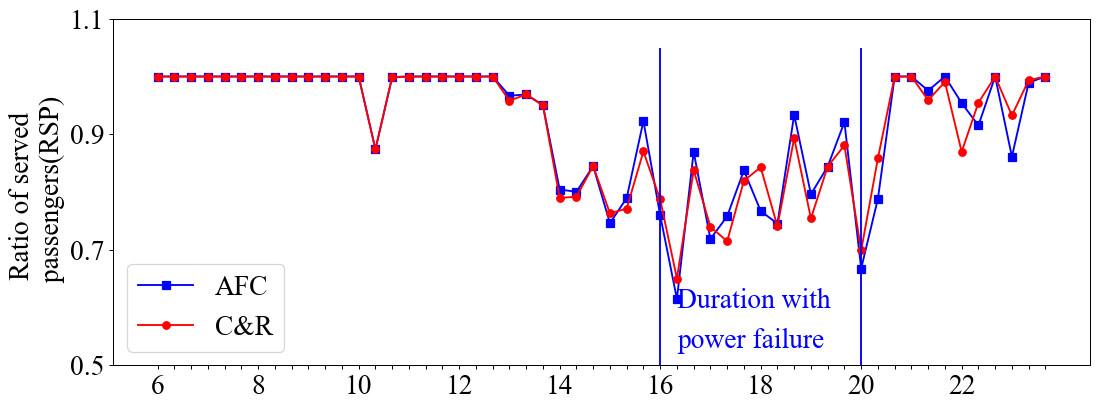

In [666]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(14,5),dpi=90)
    plt.plot(x,region_mix_afc,'s-',color = 'b',label="AFC")
    plt.plot(x,region_mix_crp,'o-',color = 'r',label="C&R")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.5, 1.1) 
    plt.text(49,0.6,'Duration with', fontproperties = legend_font,color = 'b')
    plt.text(49,0.53,'power failure', fontproperties = legend_font,color = 'b')
figuretest()

# Comparison of different beta

In [698]:

#beta = 0.1

car1 = cal_region(34) #beta = 0.1
car2 = cal_region(37) #beta = 0.01
car3 = cal_region(40) #beta = 0.001

# beta = 0.01
afc1 = cal_region(35) #beta = 0.1
afc2 = cal_region(38) #beta = 0.01
afc3 = cal_region(41) #beta = 0.001

#Beta = 0.001
c1 = cal_region(36) #beta = 0.1
c2 = cal_region(39) #beta = 0.01
c3 = cal_region(42) #beta = 0.001

region_mix_afc = []
for i in range(len(region10)):
    region_mix_afc.append((afc1[i]+afc2[i]+afc3[i])/3)

    
region_mix_crp = []
for i in range(len(region10)):
    region_mix_crp.append((car1[i]+car2[i]+car3[i])/3)
    
region_mix_c = []
for i in range(len(region10)):
    region_mix_c.append((c1[i]+c2[i]+c3[i])/3)

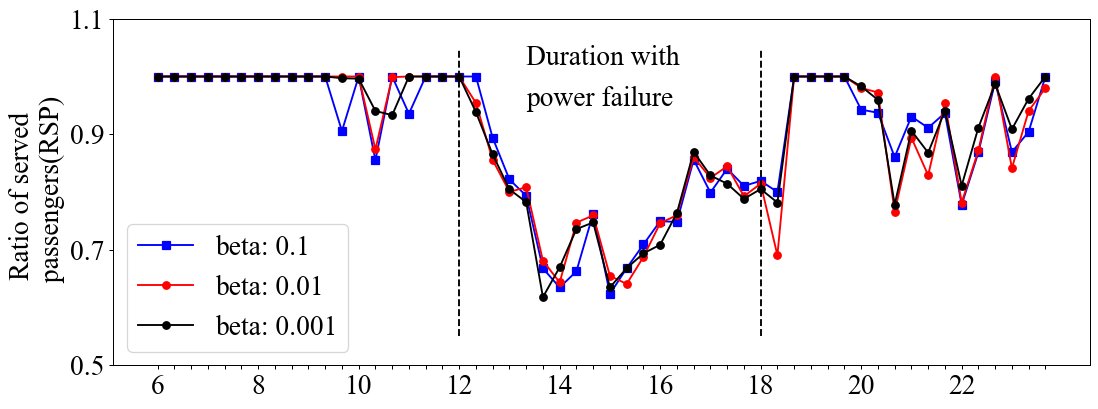

In [699]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(14,5),dpi=90)
    plt.plot(x,region_mix_afc,'s-',color = 'b',label="beta: 0.1")
    plt.plot(x,region_mix_crp,'o-',color = 'r',label="beta: 0.01")
    plt.plot(x,region_mix_c,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([36, 54], 0.55, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.5, 1.1) 
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

In [497]:
region_mix_afc = []
for i in range(len(region10)):
    region_mix_afc.append((region10[i]+region11[i] + region12[i])/3)

region_mix_oracle = []
for i in range(len(region10)):
    region_mix_oracle.append((region16[i]+region17[i] + region18[i])/3)
    
region_mix_base = []
for i in range(len(region10)):
    region_mix_base.append((region22[i]+region23[i] + region24[i])/3)
    
region_mix_rec = []
for i in range(len(region10)):
    region_mix_rec.append((region_rec0[i]+region_rec1[i] + region_rec2[i])/3)

In [469]:
region_rec0 = cal_region_rec(0)
region_rec1 = cal_region_rec(1)


In [496]:
region22 = cal_region(22)
region23 = cal_region(23)
region24 = cal_region(24)

# Four method comparison

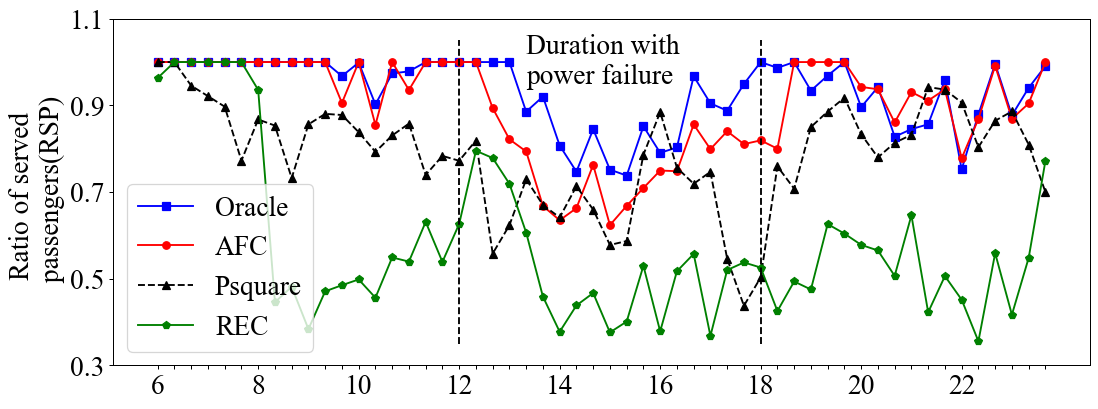

In [721]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(14,5),dpi=90)
    plt.plot(x,region_mix_oracle,'s-',color = 'b',label="Oracle")
    plt.plot(x,region_mix_afc,'o-',color = 'r',label="AFC")
    plt.plot(x,y_dis_area,'^--',color = 'black',label="Psquare")
    plt.plot(x,region_rec1,'p-',color = 'green',label="REC")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.3, 1.1) 
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

In [724]:
#REC
region_rec6 = cal_region_rec(6)
region_rec7 = cal_region_rec(7)

region_mix_rec = []
for i in range(len(region10)):
    region_mix_rec.append((region_rec6[i]+region_rec7[i])/2)

#oracle
region16 = cal_region(16)
region17 = cal_region(17)
region18 = cal_region(18)

region_mix_oracle = []
for i in range(len(region10)):
    region_mix_oracle.append((region16[i]+region17[i]+region18[i])/3)

#psquare
region_psquare2 = y_dis_win

#AFC
region25 = cal_region(25) #beta = 0.1
region26 = cal_region(26) #beta = 0.01
region27 = cal_region(27) #beta = 0.001


region_mix_afc1 = []
for i in range(len(region10)):
    region_mix_afc1.append((region26[i]+region27[i]+region25[i])/3)




In [729]:
print(region_mix_rec)

[0.9632613314453353, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9877695957121021, 0.3998343427434935, 0.38889734437692425, 0.37404440965728963, 0.43065639116461885, 0.49851516349341873, 0.4395133794338314, 0.44164930211718056, 0.5543615859217429, 0.5558346528947503, 0.6426659707920159, 0.5925585177895042, 0.6709902034420856, 0.7872109493380715, 0.706395562571448, 0.6996986370572333, 0.6943731512668148, 0.4634541503359744, 0.4562682041259718, 0.5096721834972431, 0.48501560437975166, 0.39719742631556965, 0.4737056280357568, 0.5342263358403765, 0.5059376770535753, 0.5639893058243213, 0.6861089350755598, 0.5073057999105621, 0.5457487678994137, 0.584383631374013, 0.6321771109896688, 0.4731470983587772, 0.46006707215462217, 0.5307826532456993, 0.5761251411902957, 0.46806367499366025, 0.46367166271629146, 0.5124090882813415, 0.49405878326106434, 0.5546657026675509, 0.3577889158772539, 0.5657737896645585, 0.41830979823980763, 0.33378632132741703, 0.5456701722276678, 0.464306508862514, 0.5477263588131975, 0.79

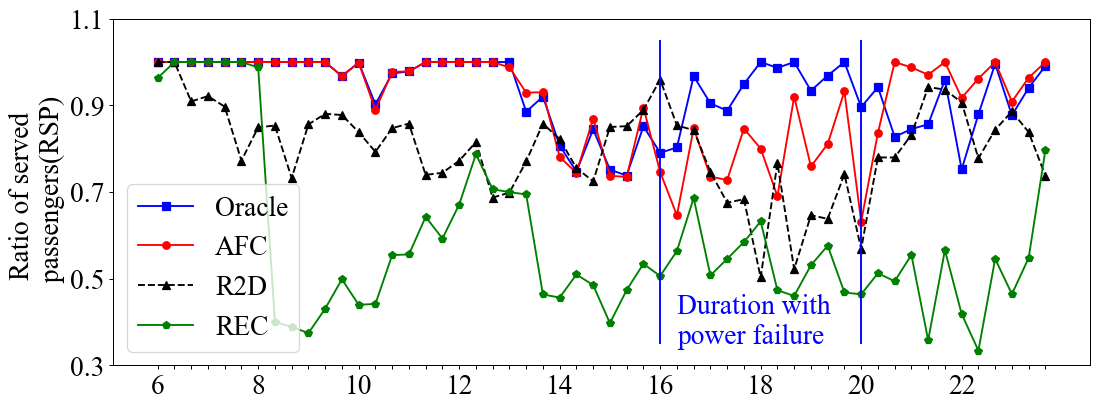

In [725]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]

    plt.figure(figsize=(14,5),dpi=90)
    plt.plot(x,region_mix_oracle,'s-',color = 'b',label="Oracle")
    plt.plot(x,region_mix_afc1,'o-',color = 'r',label="AFC")
    plt.plot(x,region_psquare2,'^--',color = 'black',label="R2D")
    plt.plot(x,region_mix_rec,'p-',color = 'green',label="REC")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

#     plt.vlines([36, 54], 0.55, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.ylim(0.3, 1.1) 
    plt.text(49,0.42,'Duration with', fontproperties = legend_font,color = 'b')
    plt.text(49,0.35,'power failure', fontproperties = legend_font,color = 'b')


figuretest()

In [720]:
print(region_rec1)

[0.9632613314453353, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9357817222535704, 0.44552969619989274, 0.48100461015040635, 0.38339551989872195, 0.4707174508078392, 0.48479456266332466, 0.4981151633583422, 0.4558960537983799, 0.5488728573482603, 0.5393247127097578, 0.6309811349594338, 0.538689561626822, 0.6262575232126133, 0.7951625750889612, 0.7784767424256772, 0.7189563977101847, 0.606198782851981, 0.4584707723753726, 0.3772987072580152, 0.4380653477992833, 0.4667131287427799, 0.37584272597602275, 0.4008278391071788, 0.5295808894417645, 0.37817563739358145, 0.5169901970056278, 0.5570389373880782, 0.36779670493515754, 0.5197607313327749, 0.5373642587347246, 0.5256304068902865, 0.42514666809049534, 0.49340526578901506, 0.4749107950093099, 0.62591373363884, 0.6039531290240778, 0.577909608602914, 0.5649638665666072, 0.506410252842591, 0.6460941151951692, 0.42230822857643086, 0.5058683295824288, 0.4513342559955819, 0.3553209227033794, 0.5586623191854695, 0.41668532846635875, 0.5477263588131978, 0.7716032

In [668]:
legend_font1 = {'family': 'Times New Roman', 'size': 16}

{'family': 'Times New Roman', 'size': 16}

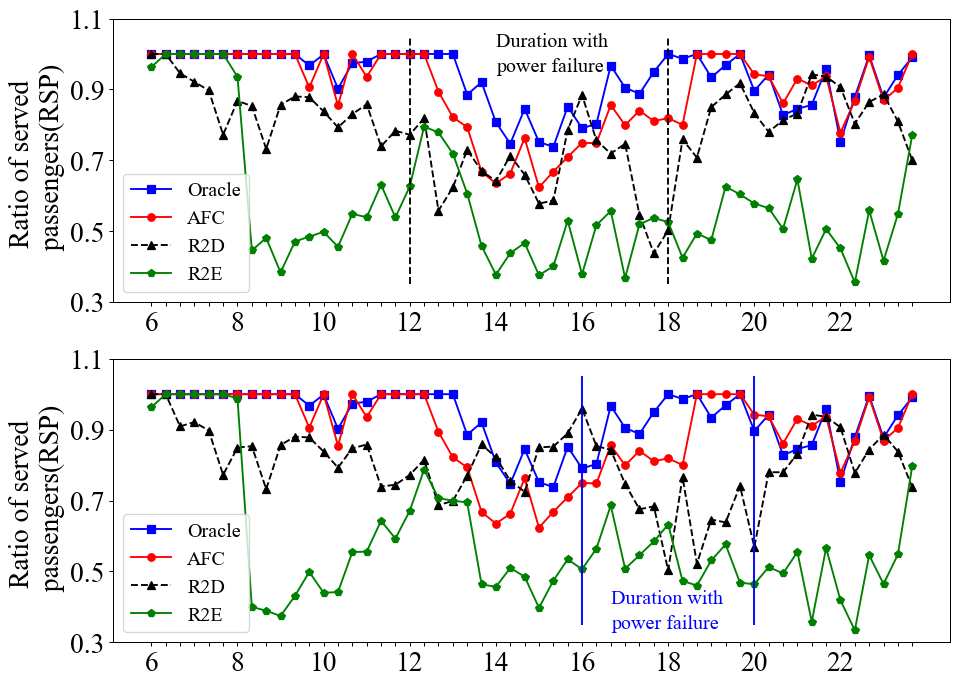

In [716]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]
    plt.figure(figsize=(12,9),dpi=90)
    
    plt.subplot(2,1,1)

    plt.plot(x,region_mix_oracle,'s-',color = 'b',label="Oracle")
    plt.plot(x,region_mix_afc,'o-',color = 'r',label="AFC")
    plt.plot(x,y_dis_area,'^--',color = 'black',label="R2D")
    plt.plot(x,region_rec1,'p-',color = 'green',label="R2E")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font1)#图例
    plt.ylim(0.3, 1.1) 
    plt.text(42,1.02,'Duration with', fontproperties = legend_font1,color = 'black')
    plt.text(42,0.95,'power failure', fontproperties = legend_font1,color = 'black')
    
    
    plt.subplot(2,1,2)
    plt.plot(x,region_mix_oracle,'s-',color = 'b',label="Oracle")
    plt.plot(x,region_mix_afc,'o-',color = 'r',label="AFC")
    plt.plot(x,region_psquare2,'^--',color = 'black',label='R2D')
    plt.plot(x,region_mix_rec,'p-',color = 'green',label="R2E")
#     plt.plot(x,region18,'o-',color = 'black',label="beta: 0.001")
#     plt.plot(x,region2,'o-',color = 'black',label="Fairness aware, beta =0.1")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")

#     plt.vlines([36, 54], 0.55, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font1)#图例
    plt.ylim(0.3, 1.1) 
    plt.text(50,0.41,'Duration with', fontproperties = legend_font1,color = 'b')
    plt.text(50,0.34,'power failure', fontproperties = legend_font1,color = 'b')
figuretest()

This figure shows the service quality in the affected region comparison between Oracle, AFC(the abbreviation for adaptive and fairness-aware coordination), P^2 charging and R2E(reactive to energy).

In the upper sub-figure we can see our method AFC shows a good performance just a little bit lower than the theoratical upper bound. This means in the affected region, our methods consider the fairness problem to maintain a good level of service quality. In the lower sub-figure, similar trend can be found here. In the disruption duration, our method also shows a good performance.

# Region based comparison

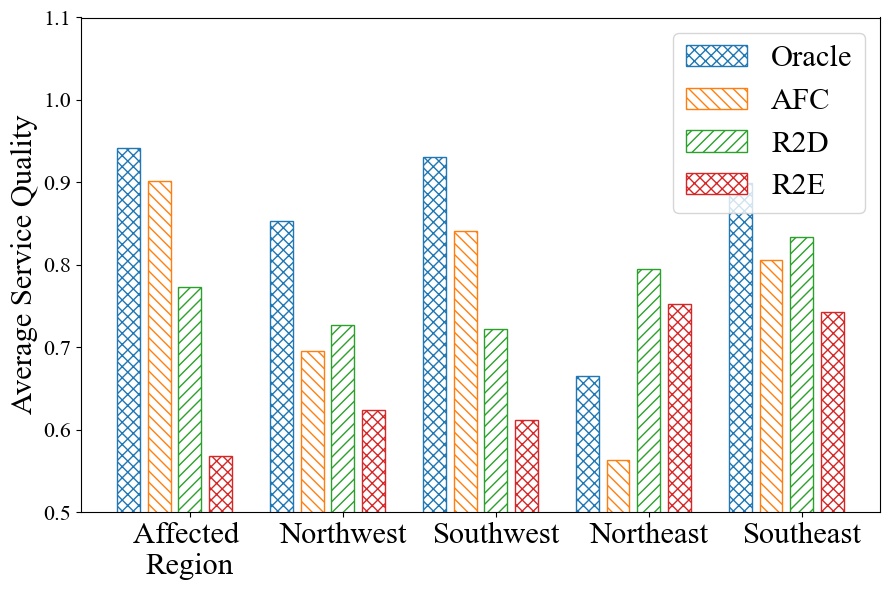

In [801]:
import numpy as np 

def cal_region_by_loc_base(region):
    region_ratio1 = []
    res = 0
    supply,demand = passengerServeNew('beta',41,'Summer')
    for x in range(54):
        cs,cd = supply[x],demand[x]
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

def cal_region_by_loc(region,round):
    region_ratio1 = []
    res = 0

    for x in range(18,72):
        cs,cd = generate_sd(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

def cal_region_by_loc_rec(region,round):
    region_ratio1 = []
    res = 0

    for x in range(18,72):
        cs,cd = generate_rec(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)


x = [m for m in range(18, 72)]
oracle,afc,baseline,rec,region_base1 = [],[],[],[],[]
regions = [[32,6,2,1],[8,14,17,12,36,34],[3,22,24,0,13,7,9,10,26,29,11,18,33],[35,27,20,5,30,23],[4,15,25,19,28]]
for region in regions:
    oracle.append(cal_region_by_loc(region,16))
    afc.append(cal_region_by_loc(region, 11))
    baseline.append(cal_region_by_loc(region,19))
    rec.append(cal_region_by_loc_rec(region,1))
    region_base1.append(cal_region_by_loc_base(region))

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


legend_font1 = {"family": "Times New Roman", "size": 16}
  
X = ['Affected \nRegion','Northwest','Southwest','Northeast','Southeast']
Ygirls = oracle
Zboys = afc
Nbio = region_base1
REC = rec

X_axis = np.arange(len(X))

plt.figure(figsize = (9,6))

plt.bar(X_axis - 0.4, Ygirls, 0.15, label='Oracle',edgecolor='C0',color='w',hatch='xxx')
plt.bar(X_axis - 0.2, Zboys, 0.15, label='AFC',edgecolor='C1',color='w',hatch='\\\\\\')
plt.bar(X_axis + 0.0, Nbio, 0.15, label='R2D',edgecolor='C2',color='w',hatch='///')
plt.bar(X_axis + 0.2, REC, 0.15, label='R2E',edgecolor='C3',color='w',hatch='xxx')

plt.ylim(0.5, 1.1)
plt.xticks(X_axis, X, fontproperties=legend_font)
plt.yticks(fontproperties=legend_font1)
# plt.xlabel("", fontproperties=legend_font)
plt.ylabel("Average Service Quality", fontproperties=legend_font)
# plt.title("Number of Students in each group",fontproperties = legend_font)
plt.legend(prop=legend_font, loc = "best")
ax= plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
plt.tight_layout()
plt.show()


In [806]:
oracle

[0.9421400126846678,
 0.8528197087428516,
 0.9309229911564318,
 0.6650288858351062,
 0.8987517696736395]

In [811]:
res = []
for i in range(len(oracle)):
    diff = abs(oracle[i] - afc[i])
    res.append(diff/oracle[i])
print(sum(res)/len(res))

0.014935941577320927


In [807]:
afc

[0.90905846425683,
 0.8325504423007642,
 0.9377223543590754,
 0.6672480463553309,
 0.9033878234847832]

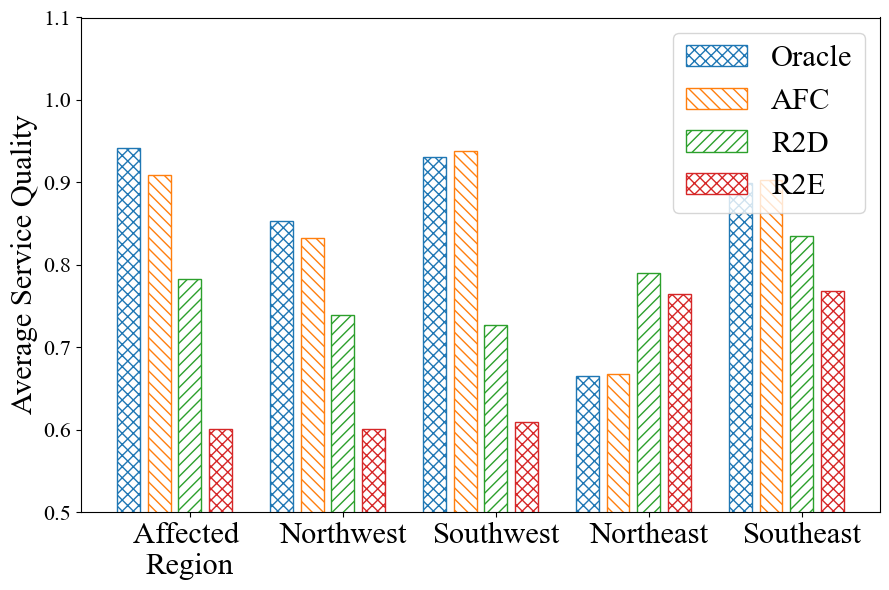

In [809]:
import numpy as np 

def cal_region_by_loc_base(region):
    region_ratio1 = []
    res = 0
    supply,demand = passengerServeNew('beta',32,'Winter')
    for x in range(len(supply)):
        cs,cd = supply[x],demand[x]
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

x = [m for m in range(18, 72)]
oracle,afc,baseline,rec,region_base1 = [],[],[],[],[]
regions = [[32,6,2,1],[8,14,17,12,36,34],[3,22,24,0,13,7,9,10,26,29,11,18,33],[35,27,20,5,30,23],[4,15,25,19,28]]
for region in regions:
    oracle.append(cal_region_by_loc(region,16))
    afc.append(cal_region_by_loc(region, 25))
    baseline.append(cal_region_by_loc(region,19))
    rec.append(cal_region_by_loc_rec(region,7))
    region_base1.append(cal_region_by_loc_base(region))

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


legend_font1 = {"family": "Times New Roman", "size": 16}
  
X = ['Affected \nRegion','Northwest','Southwest','Northeast','Southeast']
Ygirls = oracle
Zboys = afc
Nbio = region_base1
REC = rec

X_axis = np.arange(len(X))

plt.figure(figsize = (9,6))

plt.bar(X_axis - 0.4, Ygirls, 0.15, label='Oracle',edgecolor='C0',color='w',hatch='xxx')
plt.bar(X_axis - 0.2, Zboys, 0.15, label='AFC',edgecolor='C1',color='w',hatch='\\\\\\')
plt.bar(X_axis + 0.0, Nbio, 0.15, label='R2D',edgecolor='C2',color='w',hatch='///')
plt.bar(X_axis + 0.2, REC, 0.15, label='R2E',edgecolor='C3',color='w',hatch='xxx')

plt.ylim(0.5, 1.1)
plt.xticks(X_axis, X, fontproperties=legend_font)
plt.yticks(fontproperties=legend_font1)
# plt.xlabel("", fontproperties=legend_font)
plt.ylabel("Average Service Quality", fontproperties=legend_font)
# plt.title("Number of Students in each group",fontproperties = legend_font)
plt.legend(loc = "best",prop=legend_font)
ax= plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
plt.tight_layout()
plt.show()



In [810]:
oracle,afc,rec,region_base1

([0.9421400126846678,
  0.8528197087428516,
  0.9309229911564318,
  0.6650288858351062,
  0.8987517696736395],
 [0.90905846425683,
  0.8325504423007642,
  0.9377223543590754,
  0.6672480463553309,
  0.9033878234847832],
 [0.600494206750053,
  0.6003660337353698,
  0.6086762143191117,
  0.7647873055124265,
  0.767827180712541],
 [0.7829816242923416,
  0.7389728006264528,
  0.7268389065137818,
  0.7901266729428298,
  0.8351888924351963])

In [ ]:
The diagram depicted in Figure 2 displays how service
quality is affected in various types of regions over a city. It is
observed that the area where the disruption happens suffers
a substantial drop in service quality because of the power
outage. Conversely, the service quality for the regions in the
northeast and southeast increases a little bit. The illustration
suggests the deviation and unfairness of service quality in
different regions with and without disruptions

This figure shows the region-based comparison of service quality. Compared with Figure(0 ), in Fit(1), we can see that AFC helps the affected rigion reach a higher level service quality. The service level is maintained at a consistently high level which is particularly significant in the central area of the city.



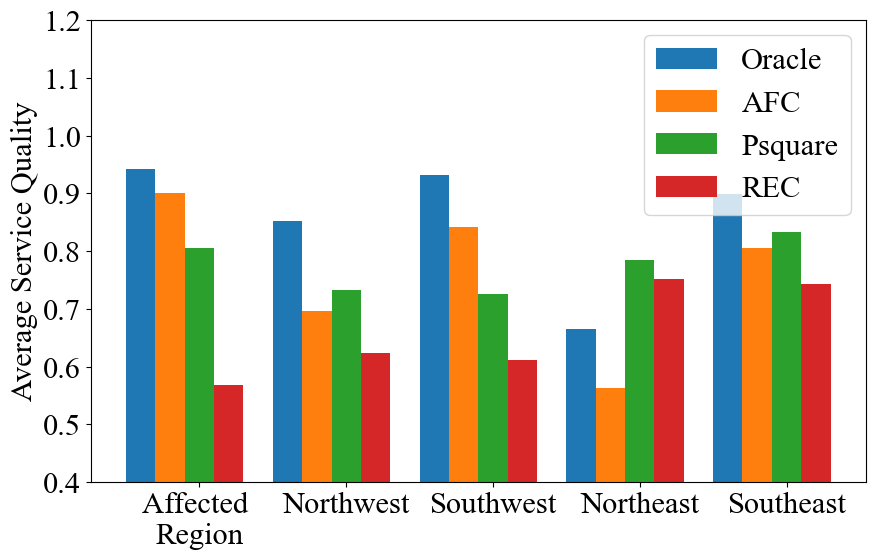

In [556]:

region_base1
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Affected \nRegion','Northwest','Southwest','Northeast','Southeast']
Ygirls = oracle
Zboys = afc
Nbio = 
region_base1
REC = rec

X_axis = np.arange(len(X))

plt.figure(figsize = (10,6))
  
plt.bar(X_axis - 0.4, Ygirls, 0.2, label = 'Oracle')
plt.bar(X_axis - 0.2, Zboys, 0.2, label = 'AFC')
plt.bar(X_axis + 0.0, Nbio, 0.2, label = 'Psquare')
plt.bar(X_axis + 0.2, REC, 0.2,label = 'REC')

plt.ylim(0.4,1.2)
plt.xticks(X_axis, X,fontproperties = legend_font)
plt.yticks(fontproperties = legend_font)
plt.xlabel("",fontproperties = legend_font)
plt.ylabel("Average Service Quality",fontproperties = legend_font)
# plt.title("Number of Students in each group",fontproperties = legend_font)
plt.legend(prop = legend_font,loc = 'best')
plt.show()

In [553]:
def cal_region_by_loc_base(region):
    region_ratio1 = []
    res = 0
    supply,demand = passengerServeNew( 'baseline',9,'Noseason')
    for x in range(len(supply)):
        cs,cd = supply[x],demand[x]
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

In [550]:
supply,demand = passengerServeNew( 'baseline',9,'Noseason')
len(supply[0][0])

37

In [516]:
def cal_region_by_loc(region,round):
    region_ratio1 = []
    res = 0

    for x in range(18,72):
        cs,cd = generate_sd(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

In [517]:
def cal_region_by_loc_rec(region,round):
    region_ratio1 = []
    res = 0

    for x in range(18,72):
        cs,cd = generate_rec(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return sum(region_ratio1)/(72-18)

In [554]:
region_base1.append(cal_region_by_loc_base([32]))

In [555]:
x = [m for m in range(18, 72)]
oracle,afc,baseline,rec,region_base1 = [],[],[],[],[]
regions = [[32,6,2,1],[8,14,17,12,36,34],[3,22,24,0,13,7,9,10,26,29,11,18,33],[35,27,20,5,30,23],[4,15,25,19,28]]
for region in regions:
    oracle.append(cal_region_by_loc(region,16))
    afc.append(cal_region_by_loc(region, 11))
    baseline.append(cal_region_by_loc(region,19))
    rec.append(cal_region_by_loc_rec(region,1))
    region_base1.append(cal_region_by_loc_base(region))

In [451]:
oracle,baseline,afc,rec

([0.9421400126846678,
  0.8528197087428516,
  0.9309229911564318,
  0.6469410450213603,
  0.8987517696736395],
 [0.9029997791596232,
  0.7725266939723648,
  0.9439137838026568,
  0.6583872538955682,
  0.9195367543806223],
 [0.9011352619050622,
  0.695816800593322,
  0.8411854533056188,
  0.5493556087982194,
  0.8060433064527773],
 [0.5949776937974872,
  0.6191525929442441,
  0.6364627232322948,
  0.7365358484099678,
  0.7383158119097885])

In [483]:
def generate_rec(round,time):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/rec/supply/round-'+str(round)+'/'+str(time), 'r')
    csupply = []
    for line in fopen:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        csupply.append(line)

    cdemand = []
    fopen1 = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/rec/demand/round-'+str(round)+'/'+str(time), 'r')
    for line in fopen1:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        cdemand.append(line)
    return csupply,cdemand # 37*37

def cal_region_rec(round):
    region = [32,6,2,1]
    region_ratio1 = []

    for x in range(18,72):
        cs,cd = generate_rec(round,x)
        s,d = 0,0
        for item in region:
            s += sum(cs[item][j] for j in range(37))
            d += sum(cd[item][j] for j in range(37))
#         print(s,d)
        if d == 0 or s>d:
            region_ratio1.append(1.0)
        else:
            region_ratio1.append(s/d)
    return region_ratio1

In [330]:
v= pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/vehicles_history/round-7/36.csv')

In [328]:
v = pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/36-check.csv')

In [331]:
v[v['location'] == 32]

,Unnamed: 0,id,energy,location,vehicle_status,remain_trip_time,destination,dispatched_charging_time,dispatched_serving_time,update_status
88,88,88,3,32,0,0,35,35,34,1
103,103,103,3,32,0,0,11,35,34,1
137,137,137,0,32,1,0,4,34,35,1
159,159,159,3,32,0,0,2,35,34,1
172,172,172,3,32,0,0,1,35,34,1
180,180,180,3,32,0,0,35,35,34,1
196,196,196,3,32,0,0,2,35,34,1
209,209,209,3,32,0,0,4,35,34,1
264,264,264,0,32,1,0,2,25,28,1
338,338,338,0,32,1,0,35,-1,25,1


In [303]:
# round 5
region = [32]
region_ratio1 = []

for x in range(18,72):
    cs,cd = generate_sd(5,x)
#     for j in range(37):
    s = sum(cs[region][j] for j in range(37))
    d = sum(cd[region][j] for j in range(37))
#     print(s,d)
    if d == 0 or s>d:
        region_ratio1.append(1.0)
    else:
        region_ratio1.append(s/d)
region_ratio1

print(len(region_ratio1))
# region_ratio+=[0.0]*20

54


In [341]:
# round 8
region = 32
region_ratio2 = []

for x in range(18,72):
    cs,cd = generate_sd(8,x)
#     for j in range(37):
    s = sum(cs[region][j] for j in range(37))
    d = sum(cd[region][j] for j in range(37))
#     print(s,d)
    if d == 0 or s>d:
        region_ratio2.append(1.0)
    else:
        region_ratio2.append(s/d)
region_ratio2

print(region_ratio2)
# region_ratio2+=[0.0]*22

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7331270429287173, 0.9666907870425304, 0.7866477809250798, 0.663984181827176, 0.5504807057198391, 0.6952389526416002, 0.890348554597157, 0.9612634888404405, 0.902471277934895, 0.9092139706669731, 0.11846044032032102, 0.20555394962510465, 0.0, 0.12331444759204302, 0.040420732347094805, 0.032616836984459774, 0.06479567235244262, 0.032598193093949956, 0.03345569719861396, 0.03109390356709361, 0.07205843599712079, 0.0, 0.0, 0.047552104411166744, 0.1848538942139895, 0.0, 0.1391734770822852, 0.34649876062321805, 0.5404542204131038, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7678301322871417, 0.7991819513131612, 0.842537248880185, 0.9817763946395324, 0.847753026010326, 0.8086362553284954, 0.7247221616903619, 1.0, 0.6869564136968792, 0.6871145285311098, 0.8533764164299134]


In [342]:
# round 6
region = 32
region_ratio = []

for x in range(18,72):
    cs,cd = generate_sd(9,x)
#     for j in range(37):
    s = sum(cs[region][j] for j in range(37))
    d = sum(cd[region][j] for j in range(37))
#     print(s,d)
    if d == 0 or s>d:
        region_ratio.append(1.0)
    else:
        region_ratio.append(s/d)
region_ratio

print(len(region_ratio))
# region_ratio+=[0.0]*20

54


In [799]:
0.8941934580473343/0.7852097997852561

1.1387955910533514

In [800]:
0.9085344459656349/0.8013188210411426

1.1337989600508678

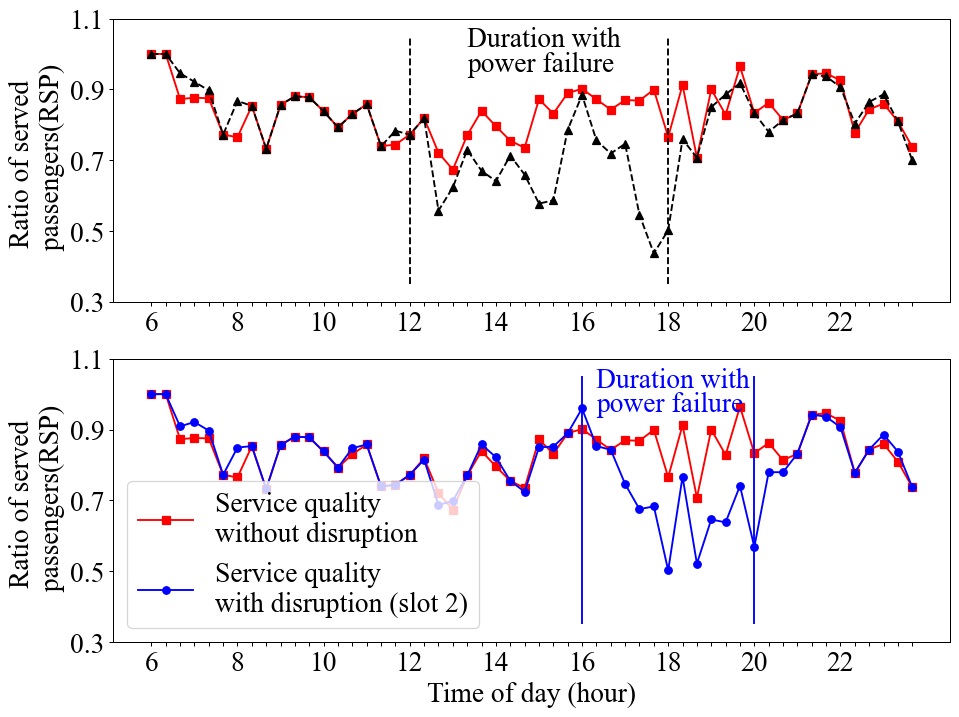

In [525]:

'''Disruption Happened in [32,6,2,1] in Summer 12pm to 6pm (Timeslot 36 to 54), Compared with baseline'''
'''Passenger Served'''
# res = passenger_serve('beta',25,'Summer')

disruption = 32

#data
x = [m for m in range(18, 72)]
res_dis = passenger_serve('beta',41,'Summer')
res_base = passenger_serve('baseline',9,'Noseason')
res_dis_winter = passenger_serve('beta',32,'Winter')

y_dis_area,y_base,y_dis_win = [],[],[]
for i in range(len(res_dis)):
    y_dis_area.append(res_dis[i][disruption])
    y_base.append(res_base[i][disruption])
    y_dis_win.append(res_dis_winter[i][disruption])
# y_dis = passenger_serve_totalratio('beta',25,'Summer')

#figure plot
plt.figure(figsize=(12,9),dpi=90)
#     plt.title('Service Quality in Central Region',fontsize = 15 )

plt.subplot(2,1,1)
plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
plt.plot(x,y_dis_area,'^--',color = 'black',label="Service quality \nwith disruption (slot 1)")
#     plt.plot(x,y_dis_win,'o-',color = 'blue',label = 'AFC')
#     plt.plot(x,y_dis_win,'o-',color = 'b',label="RSP in Disruption Area (Slot 2)")
# plt.plot(x,result_disrupt_winter,'^-',color = 'g',label = 'disruption_winter')
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
plt.ylim(0.3, 1.1) 
plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
# plt.xlim(6,24)
xt = range(18,72,6)
yt = [int(x/3) for x in xt]
plt.xticks(xt,yt,fontproperties = legend_font)
plt.xticks(x,fontproperties = legend_font)
plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
#     plt.legend(loc = "best",prop = legend_font)#图例
plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')



plt.subplot(2,1,2)
plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
plt.plot(x,y_dis_win,'o-',color = 'b',label="Service quality \nwith disruption (slot 2)")
plt.xlabel("Time of day (hour)",fontproperties = legend_font)
plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
plt.ylim(0.3, 1.1) 
plt.vlines([48, 60], 0.35, 1.05, colors='blue')
plt.xticks(xt,yt,fontproperties = legend_font)
plt.xticks(x,fontproperties = legend_font)
plt.yticks(np.arange(0.3, 1.2, step=0.2), fontproperties = legend_font)
plt.legend(loc = "best",prop = legend_font)#图例


plt.text(49,1.02,'Duration with', fontproperties = legend_font,color = 'b')
plt.text(49,0.95,'power failure', fontproperties = legend_font,color = 'b')


plt.show()


Text(40, 0.95, 'power failure')

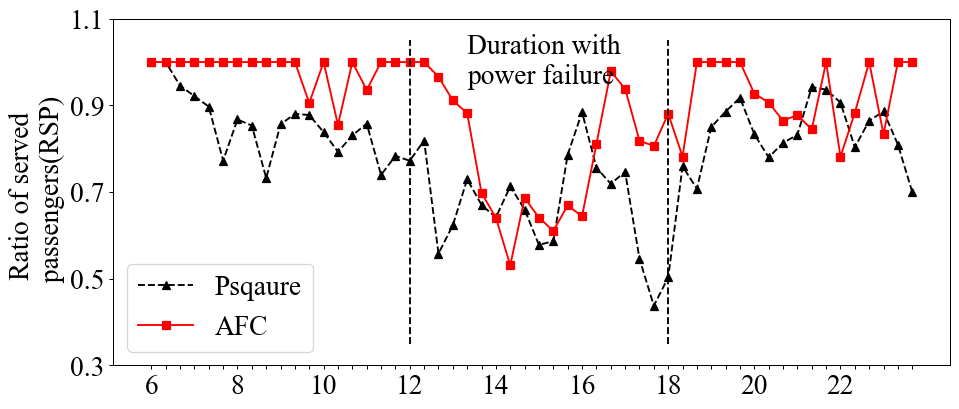

In [532]:
plt.figure(figsize=(12,5),dpi=90)
# plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
plt.plot(x,y_dis_area,'^--',color = 'black',label="Psqaure")
plt.plot(x,region10,'s-',color = 'r',label="AFC")
#     plt.plot(x,y_dis_win,'o-',color = 'blue',label = 'AFC')
#     plt.plot(x,y_dis_win,'o-',color = 'b',label="RSP in Disruption Area (Slot 2)")
# plt.plot(x,result_disrupt_winter,'^-',color = 'g',label = 'disruption_winter')
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
plt.ylim(0.3, 1.1) 
plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
# plt.xlim(6,24)
xt = range(18,72,6)
yt = [int(x/3) for x in xt]
plt.xticks(xt,yt,fontproperties = legend_font)
plt.xticks(x,fontproperties = legend_font)
plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
#     plt.legend(loc = "best",prop = legend_font)#图例
plt.legend(loc = "best",prop = legend_font)#图例
plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')


In [184]:
def generate_sd(round,time):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/supply/round-'+str(round)+'/'+str(time), 'r')
    csupply = []
    for line in fopen:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        csupply.append(line)

    cdemand = []
    fopen1 = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/demand/round-'+str(round)+'/'+str(time), 'r')
    for line in fopen1:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        cdemand.append(line)
    return csupply,cdemand # 37*37

In [170]:
cs,cd = generate_sd(0,23)
n = 0
for i in range(37):
    if sum(cs[i]) < sum(cd[i]):
        print(sum(cs[i])/ sum(cd[i]))
        n += 1
print(n)

0.4126834921455017
0.07092997521241252
0.6547382327305442
0.5328999876833499
0.03337881186463393
0.34046388102003894
0.0
0.20326201851926098
0.0
0.0
0.0
0.07964067392292078
0.0
0.19455078915427013
0.1840345302811699
0.22697592068002598
0.3782932011333766
0.19455078915423235
0.15475630955463504
0.0
0.23480267656598516
0.0
0.24911991294122302
0.0
0.1238050476436352
0.0
0.1973703658084991
0.0
0.2589078943116022
0.23279581608198308
30


In [175]:
sum(sum(cs[i][j] for j in range(37))for i in range(37))

87.0

In [176]:
sum(sum(cd[i][j] for j in range(37))for i in range(37))

430.3051344364989

0.4126834921455017
0.10639496281861878
0.06547382327305441
0.059211109742594435
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.19455078915427013
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
36


# 将初始状态写入csv避免每次从头读文件很慢

In [42]:
def obtain_regions():
    # obtain region and charging stations infomation
    # input:
    # output:
    #         n: number of regions
    #         p: number of charging poles in each region: List<>[]
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    p = {}  # number of charging poles in each region
    n = 0  # number of regions
    for k in fopen:
        k = k.strip().split(',')
        p[n] = int(float(k[-1]) / 5)
        n += 1
    return n, p

In [45]:
def exp_config():
    # experiment setup
    # input:
    # output:
    #         L:
    #         L1:
    #         L2:
    #         LK:
    L1 = RIDING_ENERGY
    L2 = CHARGING_ENERGY
    L = TOTAL_ENERGY
    K = L / L2

    return L, L1, L2, K


In [56]:
def gps_to_region(gps):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    chargergps = []
    for k in fopen:
        k = k.split(',')
        chargergps.append([float(k[0]), float(k[1])])
    near = 1000
    loc = 0
    for i in range(len(chargergps)):
        cgps = chargergps[i]
        if abs(cgps[0] - gps[0]) + abs(cgps[1] - gps[1]) < near:
            loc = i
            near = abs(cgps[0] - gps[0]) + abs(cgps[1] - gps[1])
    return loc


def get_middle_region(current, future, costtime):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    chargergps = []
    for k in fopen:
        k = k.split(',')
        chargergps.append([float(k[0]), float(k[1])])
    startx = chargergps[current][0]
    starty = chargergps[current][1]
    endx = chargergps[future][0]
    endy = chargergps[future][1]
    middlex = startx + (endx - startx) / costtime
    middley = starty + (endy - endx) / costtime
    return gps_to_region([middlex, middley])

In [57]:
import os
from datetime import datetime
def obtain_vehicles():
    """
    obtain initial vehicle information
    :param energystatus:
    :param location:
    :param occupancystatus:
    :return: num_of_v number of vehicles
    """

    energystatus = []  # 车辆energy level
    location = []  # 车辆timeslot结束时目前位置
    occupancystatus = []  # 是否载客

    # path = '/Users/jiangxiao/Desktop/data/ev/20161213/'
    path = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/ev/20161213/'

    #  读取多文件中的充电时间信息
    # 每个file代表一辆车
    for root, dirs, files in os.walk(path):
        cvalue = 0
        for file in files:
            chargingtime = []
            fopen = open(path + file, 'r')
            for k in fopen:
                k = k.strip().split(',')
                start = int(k[0])
                end = int(k[1])
                if end - start > 30:
                    chargingtime.append([start, end])
            fopen.close()
            # 如果没有充电时间》30的energystatus就说是满足了80%的电量
            if len(chargingtime) == 0:
                energystatus.append(int((0.8) / (1 / 15.0)))
            else:
                energystatus.append(cvalue % 6 + 8)
            cvalue += 1

            gpspath = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/evgps/20161213/' + file
            if os.path.isfile(gpspath):
                fopen = open(gpspath, 'r')
                gpsrecord = []
                for k in fopen:
                    k = k.strip()
                    gpsrecord.append(k)
                fopen.close()
                gps = []
                # 处理文件：6点之后的才要
                for line in gpsrecord:
                    line = line.strip().split(',')
                    ctime = datetime.strptime(line[4], '%Y-%m-%dT%H:%M:%S.000Z')
                    if (ctime.hour >= 6):
                        gps.append(float(line[2]))
                        gps.append(float(line[3]))
                if len(gps) == 0:
                    print(file)
                else:
                    # 得到车的位置信息
                    location.append(gps_to_region(gps))

            # 读取汽车使用情况的文件，里面存的应该是汽车被占用的时间段，如果属于6-24就放到occupancystatus
            # dealpath = '/Users/jiangxiao/Desktop/data/evdeal/20161213/' + file
            dealpath = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/evdeal/20161213/' + file
            if os.path.isfile(dealpath):
                fopen = open(dealpath, 'r')
                dealrecord = []
                for k in fopen:
                    k = k.strip().split(',')
                    ctime1 = datetime.strptime(k[1], '%Y-%m-%dT%H:%M:%S.000Z')
                    ctime2 = datetime.strptime(k[2], '%Y-%m-%dT%H:%M:%S.000Z')
                    dealrecord.append([ctime1.hour * 60 + ctime1.minute, ctime2.hour * 60 + ctime2.minute])
                occu = 0
                for ck in dealrecord:
                    if ck[0] <= 360 and ck[1] > 360:
                        occu = 1
                occupancystatus.append(occu)
            else:
                occupancystatus.append(0)
    num_of_v = len(energystatus)
    return energystatus, location, occupancystatus, num_of_v


In [739]:
n,p = obtain_regions()
# L,L1,L2,K = exp_config()

# timehorizon = future

energystatus, location, occupancystatus, num_of_v = obtain_vehicles()

chargingstatus = [0]*num_of_v #是否在充电 (1,waiting for free charging point) (2, charging) (0,not charging) (3, heading to charging)
remainingchargingtime = [0]*num_of_v #剩余充电时间
remainingtriptime = [0]*num_of_v #剩余trip 时间
destination = [-1]*num_of_v # 目的地
chargestation = [-1]* num_of_v # 充电region 没有的时候置-1
idledrivingtime = [0.0]*num_of_v #  等待充电时间 idle driving + waiting for charging
withoutwaitingtime = [0] * num_of_v # idle driving
dispatchedtime = [-1] * num_of_v # dispatch去充电的开始时间戳
dispatchservingtime = [-1] * num_of_v
updatestatus = [0] * num_of_v


print("number of vehicles: ", len(vehicles))

number of vehicles:  726


In [736]:
dct = {
    "id": [x for x in range(num_of_v)],
    "energy": energystatus,
    "location": location,
    "occupy_status": occupancystatus,
    "charging_status": chargingstatus,
    "charging_station": chargestation,
    "remain_charging_time": remainingchargingtime,
    "remain_trip_time": remainingtriptime,
    "destination": destination,
    "idle_driving_distance": idledrivingtime,
    "total_waiting_time": withoutwaitingtime,
    "dispatched_charging_time": dispatchedtime,
    "dispatched_serving_time": dispatchservingtime,
    "update_status": updatestatus
}
vehicles = pd.DataFrame(dct)

In [814]:
dct = {
    "id": [x for x in range(num_of_v)],
    "energy": energystatus,
    "location": location,
#     "occupy_status": occupancystatus,
    "vehicle_status": chargingstatus, # (0:C), (1:S), (2:O)
#     "charging_station": chargestation,
#     "remain_charging_time": remainingchargingtime,
    "remain_trip_time": remainingtriptime,
    "destination": destination,
    "idle_driving_distance": idledrivingtime,
#     "total_waiting_time": withoutwaitingtime,
    "dispatched_charging_time": dispatchedtime,
    "dispatched_serving_time": dispatchservingtime,
    "update_status": updatestatus,
    "decision":[0] * 726
}
vehicles = pd.DataFrame(dct)

In [815]:
vehicles.to_csv("/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/vehicles_initial.csv",index = False)

In [816]:
vehicles = pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/vehicles_initial.csv')

In [817]:
vehicles

,id,energy,location,vehicle_status,remain_trip_time,destination,idle_driving_distance,dispatched_charging_time,dispatched_serving_time,update_status,decision
0,0,8,20,0,0,-1,0.0,-1,-1,0,0
1,1,12,32,0,0,-1,0.0,-1,-1,0,0
2,2,10,7,0,0,-1,0.0,-1,-1,0,0
3,3,11,7,0,0,-1,0.0,-1,-1,0,0
4,4,12,0,0,0,-1,0.0,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
721,721,9,33,0,0,-1,0.0,-1,-1,0,0
722,722,10,8,0,0,-1,0.0,-1,-1,0,0
723,723,12,0,0,0,-1,0.0,-1,-1,0,0
724,724,12,18,0,0,-1,0.0,-1,-1,0,0


In [106]:
x = vehicles.iloc[1]['id']

1

charging status:

0: not charging  
1: charging  
2: waiting for charing  


In [ ]:
df['occupy_status'] = 

In [89]:
vehicles[vehicles['occupy_status'] == 1]

,id,energy,location,occupy_status,charging_status,charging_station,remain_charging_time,remain_trip_time,destination,idle_driving_distance,total_waiting_time,dispatched_charging_time,dispatched_serving_time,update_status
8,8,10,33,1,0,-1,0,0,0,0,0,-1,-1,0
35,35,13,15,1,0,-1,0,0,0,0,0,-1,-1,0
55,55,9,21,1,0,-1,0,0,0,0,0,-1,-1,0
85,85,9,26,1,0,-1,0,0,0,0,0,-1,-1,0
93,93,11,0,1,0,-1,0,0,0,0,0,-1,-1,0
185,185,13,36,1,0,-1,0,0,0,0,0,-1,-1,0
208,208,12,35,1,0,-1,0,0,0,0,0,-1,-1,0
241,241,9,29,1,0,-1,0,0,0,0,0,-1,-1,0
256,256,12,27,1,0,-1,0,0,0,0,0,-1,-1,0
468,468,8,3,1,0,-1,0,0,0,0,0,-1,-1,0


In [76]:
for i in range(len(vehicles)):
    if vehicles['location'][i] == 16:
        print("yes")

yes
yes
yes
yes
yes
yes
yes


In [ ]:
    inputdemand =[]
    for i in range(n):
        one=[]
        for j in range(K):
            one.append(0)
        inputdemand.append(one)

    for k in range(K):

        fopen = open('./historydemand/slot20/prediction/'+str(k+starttimeslot),'r')
        loc =0
        for line in fopen:
            line =line.strip('\n')
            line = line.split(',')
            valuesum =0
            for value in line:
                valuesum = valuesum + float(value)*1.15
            inputdemand[loc][k]= valuesum
            loc = loc+1
    demand={}
    for i in range(n):
        for k in range(K):
            demand[i,k] = inputdemand[i][k]
#---------------------------------------------

# idle driving distance

In [751]:
def idleDrivingDistance(exp,file_no,season):
    if exp == 'beta':
        fopen = open('/Users/zihanding/Developer/Psquare/newevaluation/resultdata/beta/p2withoutwaitingtime-4-0.01-'+str(file_no), 'r')
    elif exp == 'baseline':
        fopen = open('/Users/zihanding/Developer/Yukun/newevaluation/resultdata/beta/p2withoutwaitingtime-4-0.01-'+str(file_no), 'r')
    else:
        return 'Please provide valid experiment type.'
    
    result = []
    for line in fopen:
        line = line.strip()
        result.append(float(line))
    fopen.close()
    
    return result

114
119
180
245
335
343
611


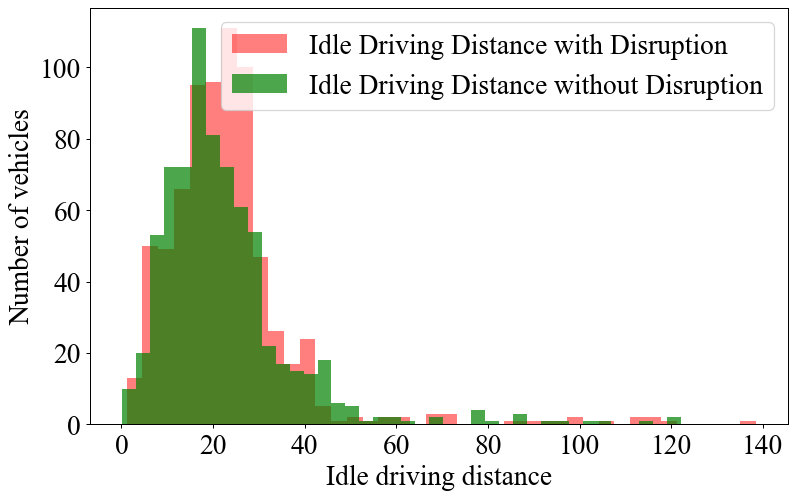

In [752]:
def idlesummer():
    '''Disruption Happened in [32,6,2,1] in Summer 12pm to 6pm (Timeslot 36 to 54), Compared with baseline'''
    # res = passenger_serve('beta',25,'Summer')

    disruption = 32

    #data
    y_dis = idleDrivingDistance('beta',41,'Summer')
    # y_dis_win = idleDrivingDistance('beta',32,'Winter')
    y_base = idleDrivingDistance('baseline',9,'Noseason')

    
    for i in range(0,len(y_base)):
        y_dis[i] = y_dis[i]/60*40
        y_base[i] = y_base[i]/60*40
        if y_dis[i] > 100:
            print(i)
    
#     print(y_dis)
    #figure plot
    plt.figure(figsize=(10,6),dpi=90)
    #折线图
    plt.hist(y_dis, bins=40, facecolor="red", alpha=0.5,label = 'Idle Driving Distance with Disruption')
    plt.hist(y_base, bins=40, facecolor="g", alpha=0.7,label = 'Idle Driving Distance without Disruption')
    # plt.hist(y_dis_win, bins=40, facecolor="blue", alpha=0.7)
    plt.ylabel("Number of vehicles",fontproperties = legend_font)
    plt.xlabel("Idle driving distance",fontproperties = legend_font)
#     plt.title("Idle drving distance (Slot 1) ",fontproperties = legend_font)
    # plt.ylim(0.6, 1) 
    # plt.xlim(6,24)
#     plt.grid(linestyle = '--', linewidth = 0.4)
#     plt.legend(loc = "best")#图例
    plt.xticks(fontproperties = legend_font)
    plt.yticks(fontproperties = legend_font)

    plt.legend(loc = 'best',prop = legend_font)#图例
    plt.show()
idlesummer()

In [782]:
def read_psquare_idle(round):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation/resultdata/beta/p2withoutwaitingtime-4-0.01-'+str(round), 'r')
    result = []
    for line in fopen:
        line = line.strip()
        result.append(float(line))
    fopen.close()
        
#     for i in range(0,len(result)):
#         result[i] = result[i]/60*40
    return result
    

In [769]:
def read_afc_idle(round):
    v = pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/vehicles_history/round-'+str(round)+'/71.csv')
    return v['idle_driving_distance']
    
    
    

(696.0989578942151, 99.79110339559239)

582.011872447383 99.79110339559239


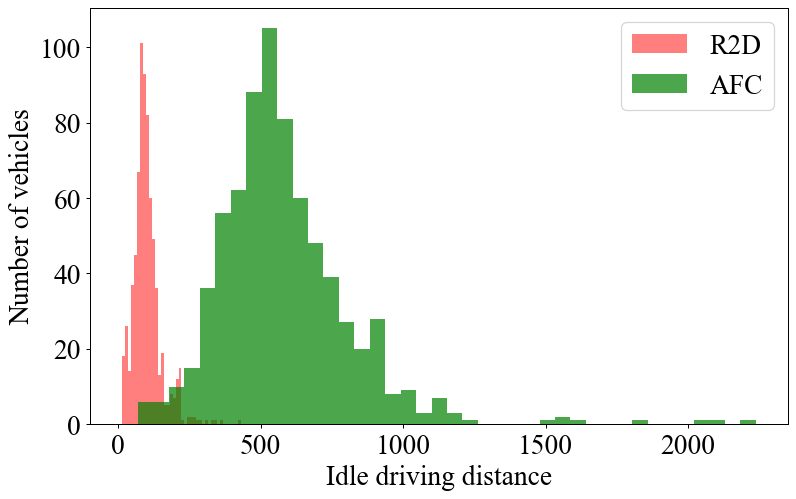

In [798]:
# psquare:
idle_psquare = read_psquare_idle(54)

#afc
idl_afc = read_afc_idle(56)

print(sum(idl_afc)/len(vehicles),sum(idle_psquare)/len(vehicles))

plt.figure(figsize=(10,6),dpi=90)
plt.hist(idle_psquare, bins=40, facecolor="red", alpha=0.5,label = 'R2D')
plt.hist(idl_afc, bins=40, facecolor="g", alpha=0.7,label = 'AFC')
# plt.hist(y_dis_win, bins=40, facecolor="blue", alpha=0.7)
plt.ylabel("Number of vehicles",fontproperties = legend_font)
plt.xlabel("Idle driving distance",fontproperties = legend_font)
plt.xticks(fontproperties = legend_font)
plt.yticks(fontproperties = legend_font)

plt.legend(loc = 'best',prop = legend_font)
plt.show()

In [835]:
def read_psquare_idle(round):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation/resultdata/beta/p2withoutwaitingtime-4-0.01-'+str(round), 'r')
    result = []
    for line in fopen:
        line = line.strip()
        result.append(float(line))
    fopen.close()
        
#     for i in range(0,len(result)):
#         result[i] = result[i]/60*40
    return result

def read_afc_idle(round):
    v = pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/vehicles_history/round-'+str(round)+'/71.csv')
    return v['idle_driving_distance']

def read_rec_idle(round):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation/resultdata/beta/idledrivingdistance-'+str(round), 'r')
    result = []
    for line in fopen:
        line = line.strip()
        result.append(float(line))

    fopen.close()
    return result

In [836]:
#Oracle
idle_oracle = read_afc_idle(62)


#AFC
# idle_afc1 = read_afc_idle(64)
idle_afc2 = read_afc_idle(63)

#psquare
# idle_psquare1 = read_psquare_idle(56)
idle_psquare2 = read_psquare_idle(55)

#REC
# idle_rec1 = read_rec_idle(10)
idle_rec2 = read_rec_idle(11)

In [821]:
cdf_oracle = np.cumsum(np.ones_like(idle_oracle)) / float(len(idle_oracle))
cdf_afc1 = np.cumsum(np.ones_like(idle_afc1)) / float(len(idle_afc1))
cdf_psqaure1 = np.cumsum(np.ones_like(idle_psquare1)) / float(len(idle_psquare1))
cdf_rec1 = np.cumsum(np.ones_like(idle_rec1)) / float(len(idle_rec1))

NameError: name 'idle_oracle' is not defined

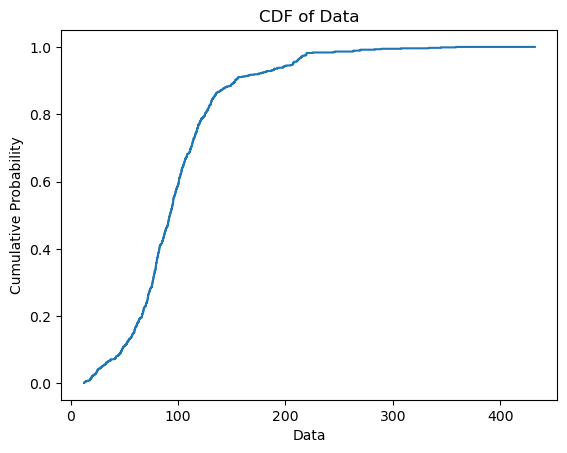

In [820]:
import numpy as np
import matplotlib.pyplot as plt



plt.step(np.sort(idle_oracle), cdf_oracle)
plt.step(np.sort(idle_afc1), cdf_afc1)
plt.step(np.sort(idle_psquare1), cdf_psqaure1)
plt.step(np.sort(idle_rec1), cdf_rec1)


plt.xlabel('Data',fontproperties = legend_font)
plt.ylabel('Cumulative Probability',fontproperties = legend_font)
# plt.title('CDF of Data')
plt.show()


In [838]:
cdf_oracle = np.cumsum(np.ones_like(idle_oracle)) / float(len(idle_oracle))
cdf_afc2 = np.cumsum(np.ones_like(idle_afc2)) / float(len(idle_afc2))
cdf_psqaure2 = np.cumsum(np.ones_like(idle_psquare2)) / float(len(idle_psquare2))
cdf_rec2 = np.cumsum(np.ones_like(idle_rec2)) / float(len(idle_rec2))

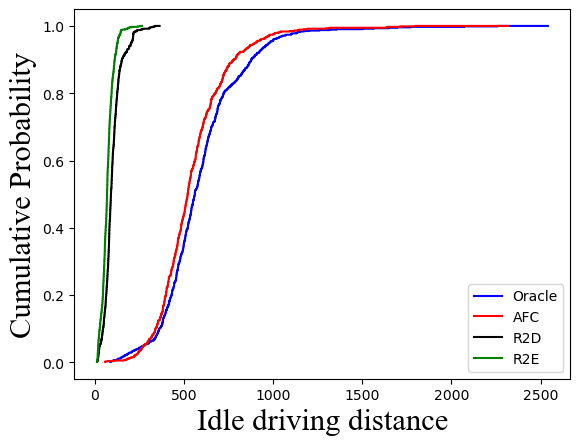

In [849]:
import numpy as np
import matplotlib.pyplot as plt



plt.step(np.sort(idle_oracle), cdf_oracle, color='blue',label = 'Oracle')
plt.step(np.sort(idle_afc2), cdf_afc2, color='red',label = 'AFC')
plt.step(np.sort(idle_psquare2), cdf_psqaure2,color='black',label = 'R2D')
plt.step(np.sort(idle_rec2), cdf_rec2, color='green',label = 'R2E')


plt.xlabel('Idle driving distance',fontproperties = legend_font)
plt.ylabel('Cumulative Probability',fontproperties = legend_font)
plt.legend()
# plt.title('CDF of Data')
plt.show()



## experiment setup


AFC   
3组 slot1 disruption K=3  （beta = 0.1，0.01，0.001）
3组 slot2  K=3   
  
Psquare  
3组 slot1 disruption K=3  （beta = 0.1，0.01，0.001）
3组 slot2  K=3  
   
Oracle   
3组 no disruption  K = 3  